In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/2021_12_07.csv', parse_dates = ['start_date', 'end_date'], dtype={'work_postal':'str'})

In [2]:
years = pd.date_range('2000-01-01', '2021-01-01', freq='YS')
temp_end_date = pd.to_datetime('2022-01-02')

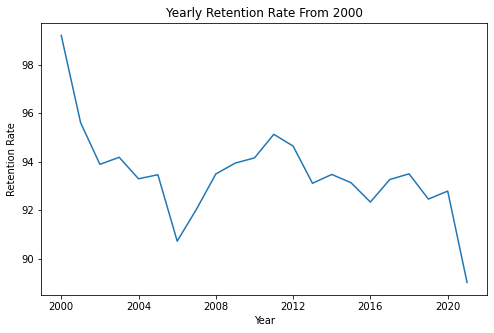

In [3]:
employee_ids = df['emplid_sec'].unique()

start_date = []
end_date = []

for ID in employee_ids:
    employee = df[df['emplid_sec'] == ID].copy()
    employee.sort_values(by=['end_date'], inplace=True)
    start_date.append(employee.iloc[0]['start_date'])
    if(pd.isnull(employee.iloc[-1]['end_date'])):
        end_date.append(temp_end_date)
    else:
        end_date.append(employee.iloc[-1]['end_date'])
    
rr_df = pd.DataFrame({'start_date': start_date,
                      'end_date': end_date})

##################################

rr = []

for year in years:
    #Employees working as of beginning of year
    starting_employees = rr_df[(rr_df['start_date'] <= year) & (rr_df['end_date'] >= year)]
    num_se = starting_employees.shape[0]
    #Employees left at the end of year
    newYear = year + DateOffset(years=1)
    ending_employees = starting_employees[starting_employees['end_date'] >= newYear]
    num_ee = ending_employees.shape[0]
    #Calculate retention rate
    if(num_ee == 0):
        rr.append(100)
    else:
        rr.append(num_ee / num_se * 100)
        
plt.figure(figsize=(8,5))
plt.plot(years, rr)
plt.title('Yearly Retention Rate From 2000')
plt.xlabel('Year')
plt.ylabel('Retention Rate');

In [4]:
# calculates the retention rate from 2000 to 2021 and graphs it using a line chart
# features: list of unique values of feat_col
# feat_col: feature column to look at
def rr_by_feature(features, feat_col):
    years = pd.date_range('2000-01-01', '2021-01-01', freq='YS')
    temp_end_date = pd.to_datetime('2022-01-02')
    
    plt.figure(figsize=(10,7))
    plt.title('Yearly Retention Rate From 2000')
    plt.xlabel('Year')
    plt.ylabel('Retention Rate');

    for f in features:
        start_date = []
        end_date = []
        rr = []
    
        temp_df = df[df[feat_col] == f].copy()
        employee_ids = temp_df['emplid_sec'].unique()

        for ID in employee_ids:
            employee = df[df['emplid_sec'] == ID].copy()
            employee.sort_values(by=['end_date'], inplace=True)
            start_date.append(employee.iloc[0]['start_date'])
            if(pd.isnull(employee.iloc[-1]['end_date'])):
                end_date.append(temp_end_date)
            else:
                end_date.append(employee.iloc[-1]['end_date'])
    
        rr_df = pd.DataFrame({'start_date': start_date, 'end_date': end_date})

        for year in years:
            #Employees working as of beginning of year
            starting_employees = rr_df[(rr_df['start_date'] <= year) & (rr_df['end_date'] >= year)]
            num_se = starting_employees.shape[0]
            #Employees left at the end of year
            newYear = year + DateOffset(years=1)
            ending_employees = starting_employees[starting_employees['end_date'] >= newYear]
            num_ee = ending_employees.shape[0]
            #Calculate retention rate
            if(num_ee == 0):
                rr.append(100)
            else:
                rr.append(num_ee / num_se * 100)
        plt.plot(years, rr);

    plt.legend(features);

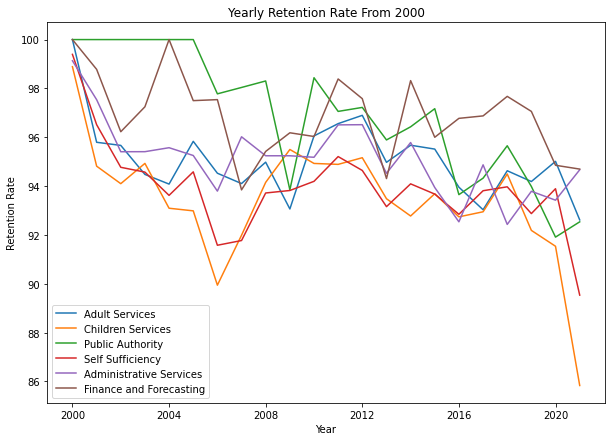

In [5]:
division = df[df['division'] != 'Other']['division'].unique()
rr_by_feature(division, 'division')

investigate finance and forecasting around 2008

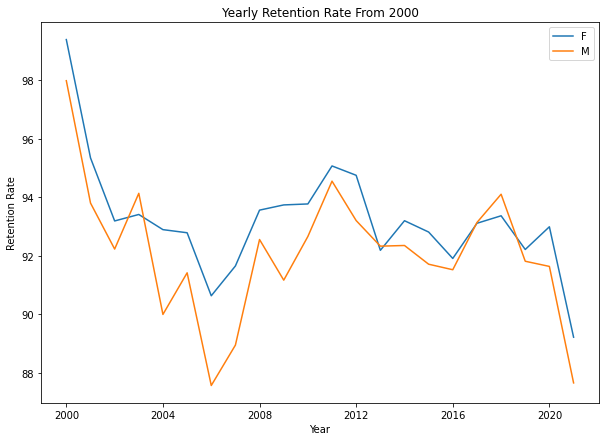

In [6]:
sex = ['F', 'M']
rr_by_feature(sex, 'sex')

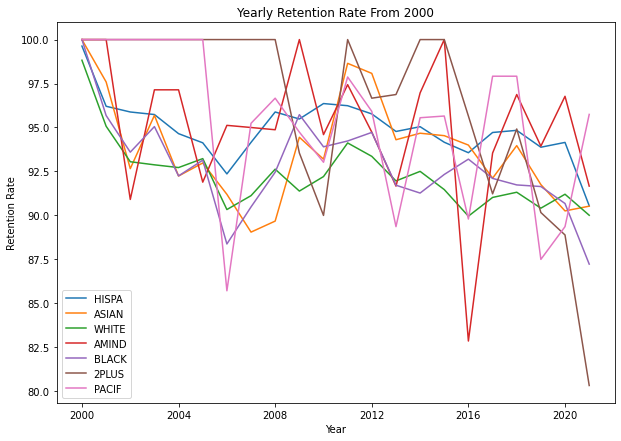

In [7]:
ethnicity = ['HISPA', 'ASIAN', 'WHITE', 'AMIND', 'BLACK', '2PLUS', 'PACIF']
rr_by_feature(ethnicity, 'ethnicity')

investigate 2PLUS dip

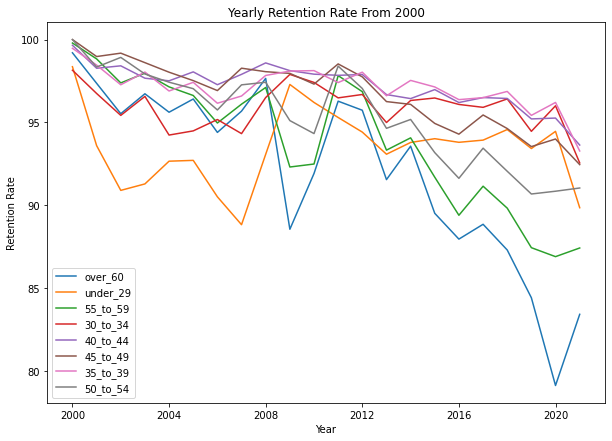

In [8]:
age_group = ['over_60', 'under_29', '55_to_59', '30_to_34', '40_to_44', '45_to_49', '35_to_39', '50_to_54']
rr_by_feature(age_group, 'age_group')

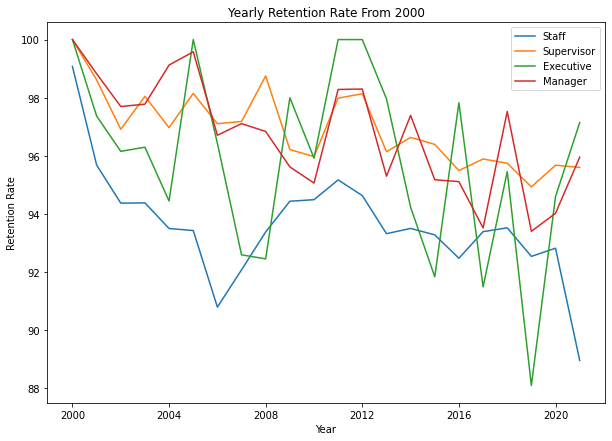

In [9]:
rr_by_feature(df['classification'].unique(), 'classification')